# FIFA RANKING PREDICTION MODEL
---

Nama : Riki  
Batch : HCK - 013

**Objective** :
- This project goal is to create a model that could predict the FIFA Overall Ranking

**Background**

**Problem Exploratory Question**

## Import Libraries
> !pip install scikit-learn

In [1]:
# Libraries for Data Manipulation
import pandas as pd
import numpy as np

# Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

# Model Saving
import pickle
import json

## Data Loading

penjelasan terkait
- data nya tentang apa
- link atau sumber datanya
- informasi terkait dengan kolom

In [2]:
# data loading
data = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D1PM%20-%20Machine%20Learning%20Problem%20Framing.csv')

# Show data
data.head()

,Name,Age,Height,Weight,ValueEUR,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Overall
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91


Data successfully loaded

In [3]:
# Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               19260 non-null  object
 1   Age                19260 non-null  int64 
 2   Height             19260 non-null  int64 
 3   Weight             19260 non-null  int64 
 4   ValueEUR           19260 non-null  int64 
 5   AttackingWorkRate  19260 non-null  object
 6   DefensiveWorkRate  19260 non-null  object
 7   PaceTotal          19260 non-null  int64 
 8   ShootingTotal      19260 non-null  int64 
 9   PassingTotal       19260 non-null  int64 
 10  DribblingTotal     19260 non-null  int64 
 11  DefendingTotal     19260 non-null  int64 
 12  PhysicalityTotal   19260 non-null  int64 
 13  Overall            19260 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 2.1+ MB


- baris ada berapa
- kolom ada berapa
- tipe datanya apa saja

## Exploratory Data Analysis (EDA)

biasanya terkait dengan problem exploration question?
> 5W + 1H

#### Rating Distribution and Weight vs Height

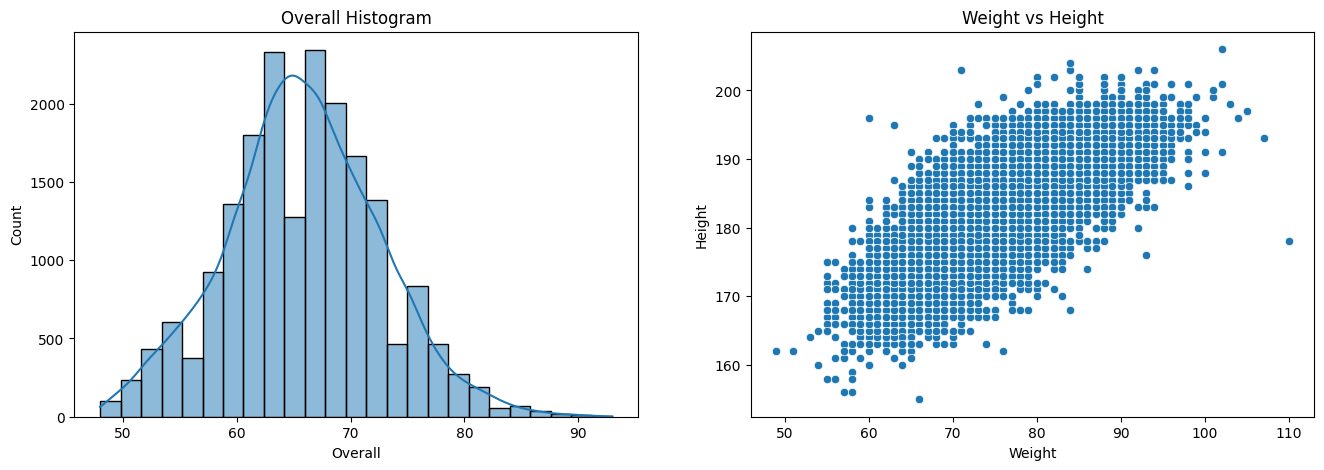

In [4]:
# Visualization
plt.figure(figsize=(16, 5))

# Rating Distribution
plt.subplot(1,2,1)
sns.histplot(data['Overall'], kde=True, bins=25)
plt.title('Overall Histogram')

# Weight vs Height Scatter Plot
plt.subplot(1,2,2)
sns.scatterplot(x='Weight', y='Height', data=data)
plt.title('Weight vs Height')

# Show the Plot
plt.show()

**Insight**
- Point 1
- Point 2
- Point 3

## Feature Engineeering

**Splitting Dataset**

In [5]:
# create copy from the original dataset
df = data.copy()

In [6]:
# Split between label and feature
X = df.drop(columns=['Name', 'Overall'], axis=1)      # ini features
y = df['Overall']                                     # ini label

# Split into Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=42)

### Handling Outliers
### Handling Missing values
### Handling Duplicates
### Feature Selection
- uji korelasi, yang tidak ada korelasinya itu di drop


### Feature Encoding and Scaling
- encoding, merubah data yang bersifat text atau `str` menjadi integer
- scaling, proses menyamakan atau menormalisasi skala dari kolom-kolom numerikal

> kolom kategorikal -> encoding  
kolom numerikal -> scaling

In [7]:
# split between num cols and cat cols
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(include='object').columns.tolist()

# split train set into num and cat set
X_train_num = X_train[num_cols]
X_train_cat = X_train[cat_cols]

# split test set into num and cat set
X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]

#### Scaling

In [8]:
# define the scaler
scaler = MinMaxScaler()

# Fit the scaler
scaler.fit(X_train_num)

# Transfrom the data
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

#### Encoding

In [9]:
# define Encoder
encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High'],
                                     ['Low', 'Medium', 'High']])

# fit the encoder
encoder.fit(X_train_cat)

# Transform the data
X_train_cat_encode = encoder.transform(X_train_cat)
X_test_cat_encode = encoder.transform(X_test_cat)

#### Concate the numerical and categorical data

In [10]:
# Concate
X_train_final = np.concatenate([X_train_cat_encode, X_train_num_scaled], axis=1)
X_test_final = np.concatenate([X_test_cat_encode, X_test_num_scaled], axis=1)

# Transform into dataframe
X_train_final = pd.DataFrame(X_train_final, columns=[cat_cols + num_cols])
X_test_final = pd.DataFrame(X_test_final, columns=[cat_cols + num_cols])

## Model Definition
> penjelasan model apa yang digunakan

In [11]:
# Define Model
model = LinearRegression()

### Model Training

In [12]:
# Train the model into train set
model.fit(X_train_final, y_train)

LinearRegression()

### Model Evaluation

In [13]:
# Evaluate the model performance on Train set
y_pred_train = model.predict(X_train_final)

# Metric evaluation
print('MAE Score : ', mean_absolute_error(y_train, y_pred_train))

MAE Score :  2.345545208642147


In [14]:
# Evaluate the model performance on test set
y_pred_test = model.predict(X_test_final)

# Metric evaluation
print('MAE Score : ', mean_absolute_error(y_test, y_pred_test))

MAE Score :  2.3414145640024873


**Insight**
- point 1
- point 2

### Model Saving

In [15]:
# Save list kolom kategorikal
with open('list_cat_cols.txt', 'w') as file_1:
  json.dump(cat_cols, file_1)

# Save list kolom numerikal
with open('list_num_cols.txt', 'w') as file_2:
  json.dump(num_cols, file_2)

# Save Encoder
with open('encoder.pkl', 'wb') as file_3:
  pickle.dump(encoder, file_3)

# Save scaler
with open('scaler.pkl', 'wb') as file_4:
  pickle.dump(scaler, file_4)

# Save model
with open('model.pkl', 'wb') as file_5:
  pickle.dump(model, file_5)